<a href="https://colab.research.google.com/github/HayeonKimm/project/blob/master/Machine-Learning/toy_machine_pjt/%EC%84%9C%EC%9A%B8_%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1%ED%95%B4%EB%B3%B4%EA%B8%B0(%ED%86%A0%EC%9D%B4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
import tensorflow as tf
# import data_process
from keras.datasets import imdb
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import os
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/국토교통부_표준주택가격_20210101.csv',encoding='cp949')
df.head()

,시도,시군구,일련번호,소재지,도로명주소,지목,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,층수(지상/지하),용도지역,용도지구,도로교통,형상지세,주건물구조,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,1,청운동 4-18,자하문로36길 34,대,단독주택,1193.4,499.24,268.70,32.45,22.52,1,(2/1),제1종일반주거지역,자연경관지구,세로(가),정방형,연와조,1994,고급 주택지대,4655000000
1,서울특별시,종로구,2,청운동 8-3,자하문로35길 5,대,단독주택,924.0,374.15,220.93,33.00,23.91,1,(2/1),제1종일반주거지역,자연경관지구,세로(가),사다리형,연와조 철근콘크리트조(RC조 RS조),1965,일반 주택지대,3134000000
2,서울특별시,종로구,3,청운동 12-9,자하문로36길 11,대,단독주택,237.0,159.74,91.54,67.40,38.62,1,(2/0),제1종일반주거지역,자연경관지구,소로한면,부정형,연와조,1967,고급 주택지대,941000000
3,서울특별시,종로구,4,청운동 15-10,창의문로1길 20-5,대,단독주택,637.5,508.97,189.33,54.42,29.70,2,(2/1),제1종일반주거지역,자연경관지구,세로(가),사다리형,철근콘크리트조(RC조 RS조),1978,고급 주택지대,2775000000
4,서울특별시,종로구,5,청운동 15-26,창의문로1길 7,대,단독주택,62.8,33.06,33.06,52.64,52.64,1,(1/0),자연녹지지역,자연경관지구,세로(불),사다리형,시멘트블럭조,1963,기존 주택지대,99700000


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,803 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [ ]:
import missingno
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_

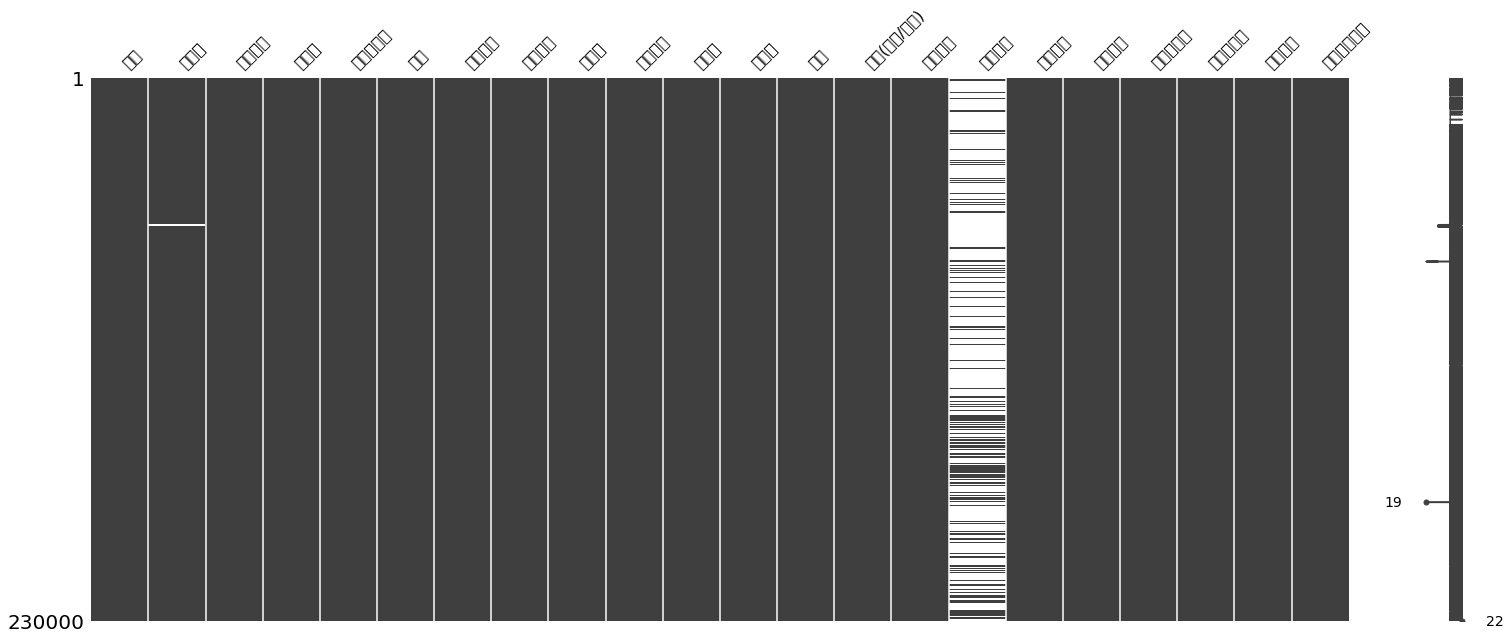

In [ ]:
missingno.matrix(df)

In [ ]:
df.isnull().sum()

시도              176
시군구            1148
일련번호              0
소재지               0
도로명주소             0
지목                0
건물용도              0
대지면적              0
연면적               0
건축면적              0
용적률               0
건폐율               0
동수                0
층수(지상/지하)         0
용도지역              0
용도지구         175538
도로교통              0
형상지세              0
주건물구조             0
사용승인일             0
주위환경              0
주택공시가격            0
dtype: int64

## 칼럼 확인

In [ ]:
df.columns

Index(['시도', '시군구', '일련번호', '소재지', '도로명주소', '지목', '건물용도', '대지면적', '연면적',
       '건축면적', '용적률', '건폐율', '동수', '층수(지상/지하)', '용도지역', '용도지구', '도로교통', '형상지세',
       '주건물구조', '사용승인일', '주위환경', '주택공시가격'],
      dtype='object')

In [ ]:
# import seaborn as sns

# sns.pairplot(train_data[["MEDV", "RM", "AGE", "DIS", "PTRATIO"]]);

In [ ]:
df.head(3)

,시도,시군구,일련번호,소재지,도로명주소,지목,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,층수(지상/지하),용도지역,용도지구,도로교통,형상지세,주건물구조,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,1,청운동 4-18,자하문로36길 34,대,단독주택,1193.4,499.24,268.70,32.45,22.52,1,(2/1),제1종일반주거지역,자연경관지구,세로(가),정방형,연와조,1994,고급 주택지대,4655000000
1,서울특별시,종로구,2,청운동 8-3,자하문로35길 5,대,단독주택,924.0,374.15,220.93,33.00,23.91,1,(2/1),제1종일반주거지역,자연경관지구,세로(가),사다리형,연와조 철근콘크리트조(RC조 RS조),1965,일반 주택지대,3134000000
2,서울특별시,종로구,3,청운동 12-9,자하문로36길 11,대,단독주택,237.0,159.74,91.54,67.40,38.62,1,(2/0),제1종일반주거지역,자연경관지구,소로한면,부정형,연와조,1967,고급 주택지대,941000000


## 범주형 선별, 드랍

In [ ]:
df.drop(['도로명주소','일련번호','형상지세','주건물구조','지목','층수(지상/지하)'],axis=1,inplace=True)
df.head(1)

,시도,시군구,소재지,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,용도지역,용도지구,도로교통,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,청운동 4-18,단독주택,1193.4,499.24,268.7,32.45,22.52,1,제1종일반주거지역,자연경관지구,세로(가),1994,고급 주택지대,4655000000


In [ ]:
# df.isnull().sum()
df.head(3)

,시도,시군구,소재지,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,용도지역,용도지구,도로교통,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,청운동 4-18,단독주택,1193.4,499.24,268.70,32.45,22.52,1,제1종일반주거지역,자연경관지구,세로(가),1994,고급 주택지대,4655000000
1,서울특별시,종로구,청운동 8-3,단독주택,924.0,374.15,220.93,33.00,23.91,1,제1종일반주거지역,자연경관지구,세로(가),1965,일반 주택지대,3134000000
2,서울특별시,종로구,청운동 12-9,단독주택,237.0,159.74,91.54,67.40,38.62,1,제1종일반주거지역,자연경관지구,소로한면,1967,고급 주택지대,941000000


In [ ]:
df['소재지']

0               청운동 4-18
1                청운동 8-3
2               청운동 12-9
3              청운동 15-10
4              청운동 15-26
               ...      
229995       표선면 토산리 540
229996     표선면 토산리 936-3
229997    표선면 토산리 1363-4
229998    표선면 토산리 1416-3
229999    표선면 토산리 1826-1
Name: 소재지, Length: 230000, dtype: object

## 서울 데이터 뽑아내기

In [ ]:
df=df[df['시도'] == '서울특별시']
df['시도'].value_counts()

서울특별시    22510
Name: 시도, dtype: int64

## 데이터 전처리

In [ ]:
df['소재지']=df['소재지'].str[:4]

In [ ]:
df.head()

,시도,시군구,소재지,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,용도지역,용도지구,도로교통,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,청운동,단독주택,1193.4,499.24,268.70,32.45,22.52,1,제1종일반주거지역,자연경관지구,세로(가),1994,고급 주택지대,4655000000
1,서울특별시,종로구,청운동,단독주택,924.0,374.15,220.93,33.00,23.91,1,제1종일반주거지역,자연경관지구,세로(가),1965,일반 주택지대,3134000000
2,서울특별시,종로구,청운동,단독주택,237.0,159.74,91.54,67.40,38.62,1,제1종일반주거지역,자연경관지구,소로한면,1967,고급 주택지대,941000000
3,서울특별시,종로구,청운동,단독주택,637.5,508.97,189.33,54.42,29.70,2,제1종일반주거지역,자연경관지구,세로(가),1978,고급 주택지대,2775000000
4,서울특별시,종로구,청운동,단독주택,62.8,33.06,33.06,52.64,52.64,1,자연녹지지역,자연경관지구,세로(불),1963,기존 주택지대,99700000


In [ ]:
# df=df.drop(columns='도로교통')
# df=df.drop(columns='동수')

In [ ]:
df.columns

Index(['시도', '시군구', '소재지', '건물용도', '대지면적', '연면적', '건축면적', '용적률', '건폐율', '동수',
       '용도지역', '용도지구', '도로교통', '사용승인일', '주위환경', '주택공시가격'],
      dtype='object')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

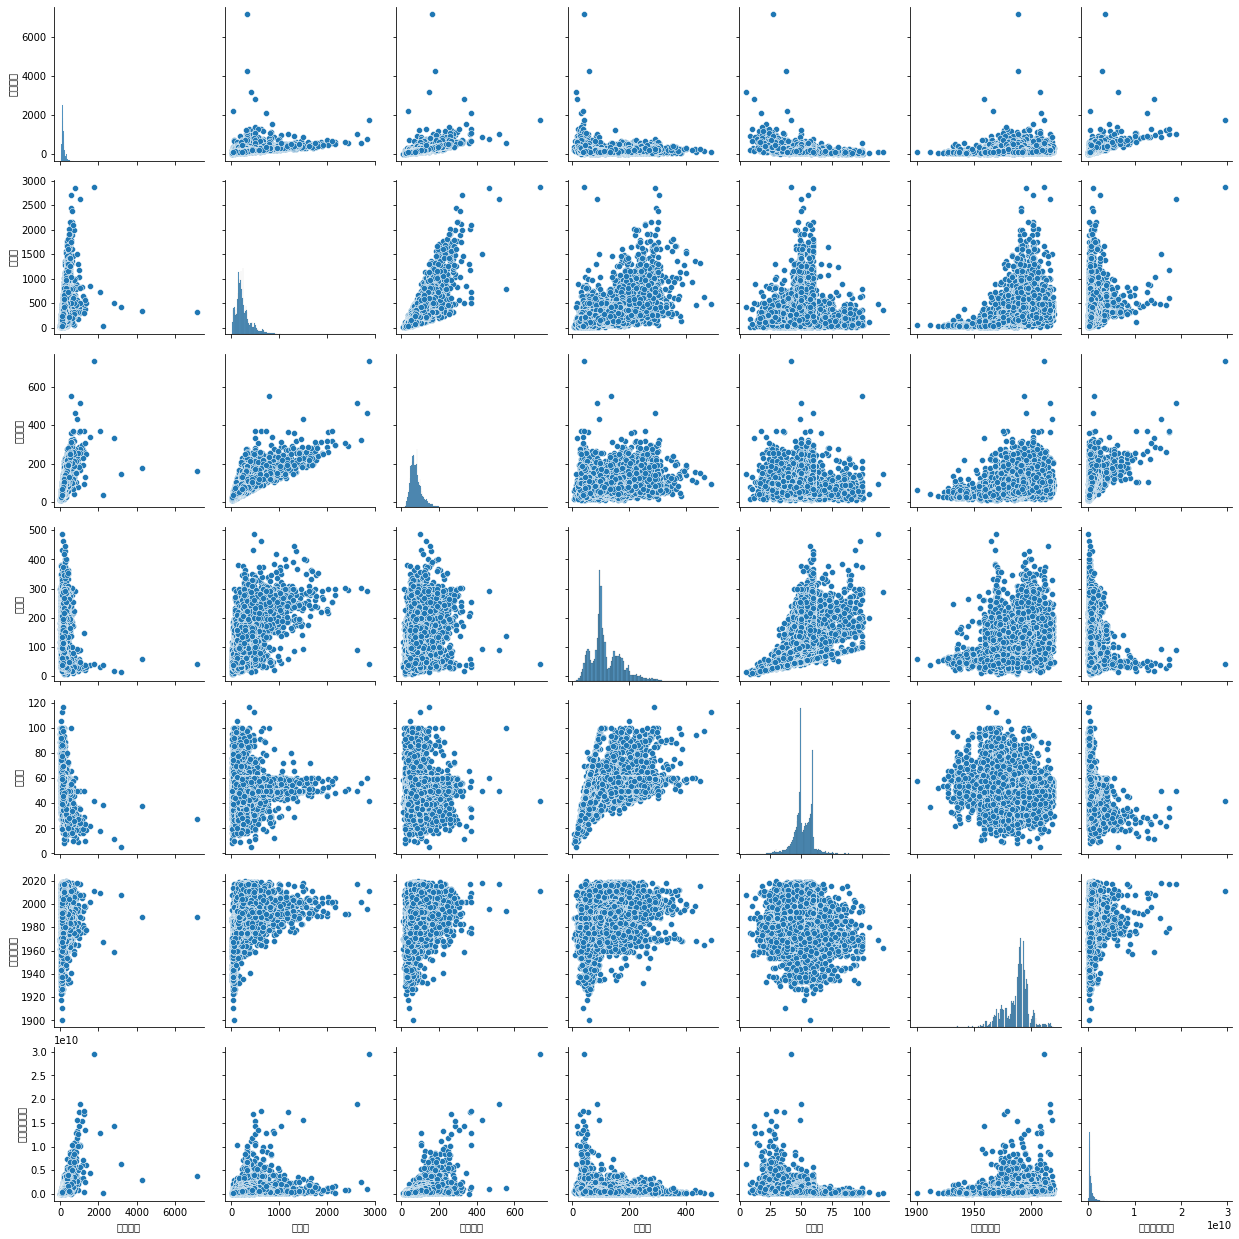

In [ ]:
import seaborn as sns

sns.pairplot(df[['대지면적', '연면적', '건축면적', '용적률', '건폐율', '사용승인일','주택공시가격']]);

In [ ]:
df.head(1)

,시도,시군구,소재지,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,용도지역,용도지구,도로교통,사용승인일,주위환경,주택공시가격
0,서울특별시,종로구,청운동,단독주택,1193.4,499.24,268.7,32.45,22.52,1,제1종일반주거지역,자연경관지구,세로(가),1994,고급 주택지대,4655000000


## 시군구가 더 좋은 변수일지 소재지가 좋은 변수일지는 아직 모르겠다.
## 일단 시군구로 둔다. 소재지는 너무 카테고리 수가 많아서 오히려 과적합 가능성이 될거라 생각

## 건축면적 연면적 대지면적은 서로 상관관계가 많이 깊어보인다. 하나만 선택한다. --> 건축면적

In [ ]:
# df.drop(columns=['대지면적','연면적'],inplace=True)
df.drop(columns=['소재지','시도'],inplace=True)

## 칼럼 정리

In [ ]:
#  df=df[['시군구','건물용도','용도지역'	,'용도지구','주위환경',	'건축면적'	,'용적률'	,'건폐율'		,'사용승인일'	,'주택공시가격']]
df.head(1)

,시군구,건물용도,대지면적,연면적,건축면적,용적률,건폐율,동수,용도지역,용도지구,도로교통,사용승인일,주위환경,주택공시가격
0,종로구,단독주택,1193.4,499.24,268.7,32.45,22.52,1,제1종일반주거지역,자연경관지구,세로(가),1994,고급 주택지대,4655000000


In [ ]:
# df['주택공시가격']['시군구'].value_counts()/

KeyError: ignored

In [ ]:
# # import seaborn as sns

# sns.pairplot(df[[ '건축면적', '용적률', '건폐율', '사용승인일','주택공시가격']])

# 더미변수 생성

In [ ]:
# pd.get_dummies(df['용도지역'])
df=pd.get_dummies(df, columns = ['시군구'	,'건물용도',	'용도지역',	'용도지구'	,'주위환경'	])
# pd.get_dummies(data = df, columns = ['용도지역'], prefix = '용도지역')

In [ ]:
df=df.drop(columns=['동수','도로교통'])

## split train , test

In [ ]:
X = df.drop(columns='주택공시가격')
y = df['주택공시가격']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.3)

In [ ]:
print(x_train.shape,
x_test.shape)

(15757, 100) (6753, 100)


In [ ]:

# x_train = np.asarray(train.drop('주택공시가격',1))
# y_train = np.asarray(train['주택공시가격'])
# x_test = np.asarray(test.drop('주택공시가격',1))
# y_test = np.asarray(test['주택공시가격'])
# eta_features = [x for i,x in enumerate(tada_eta.columns) if i!=0]

## Random Foreset

## 에러값이 너무 크다.. 왜?

In [ ]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
# rf_pred=rf.predict(x_test)

mse = mean_squared_error(y_test, rf.predict(x_test))
print('{:.4f}'.format(mse))

80336388344695216.0000


## 오류찾기

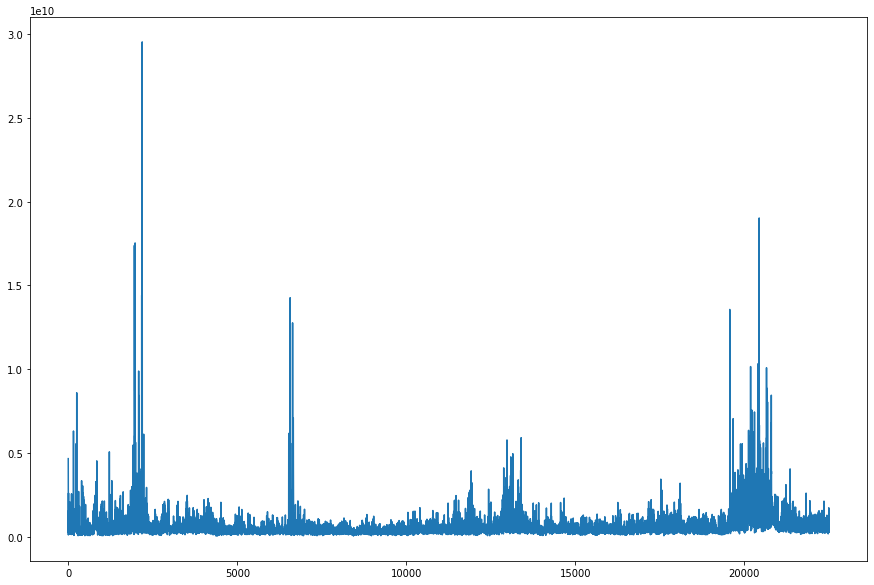

In [ ]:
df.head(1)
plt.figure(figsize=(15,10))
df['주택공시가격'].plot.line()

## 값이 너무 제각각이다. 정규화가 필요하다 생각..

## 이상치도 제거필요.. 가격이 너무 높은 주택들이 있을 것 같다.

In [ ]:
df['주택공시가격'].str[:]

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators':[100,200,300],
#     'max_depth' : [6, 8, 10, 12], 
#     'min_samples_leaf' : [8, 12, 18 ],
#     'min_samples_split' : [8, 16, 20]
# }
# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# rf_clf = RandomForestRegressor(random_state=0, n_jobs=-1)
# grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=3, n_jobs=-1 )
# grid_cv.fit(x_train , y_train)

# print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
# print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

## Fearture importances_

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

Fitting 3 folds for each of 24 candidates, totalling 72 fits
{'early_stopping': 'True', 'learning_rate': 0.02, 'max_depth': 4, 'max_iter': 200, 'min_samples_leaf': 1, 'random_state': 0}


In [ ]:
params = {'max_iter': 200, # 트리의 개수
          'max_depth': 4,
           'min_samples_leaf': 1,
          'learning_rate': 0.02,
          'early_stopping':'True',
          'random_state':0
           } # 'squared_error'와 같음


hist = ensemble.HistGradientBoostingRegressor(**params)
hist.fit(x_train, y_train)

mse = mean_squared_error(y_test, hist.predict(x_test))
print('{:.4f}'.format(mse))

107258468579512560.0000


In [ ]:
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
params = {'max_iter': 100, # 트리의 개수
          'max_depth': 5,
           'min_samples_leaf': 1,
          'learning_rate': 0.05,
          'early_stopping':'True',
          'random_state':0
           } # 'squared_error'와 같음




xgb = XGBRegressor(**params)
xgb.fit(train_x, train_y)


y_preds = xgb.predict(test_x)
mse = mean_squared_error(test_y, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(test_y, y_preds)))



# mse = mean_squared_error(y_test, hist.predict(x_test))
# print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
# print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

# mae = mean_absolute_error(y_test, hist.predict(x_test))
# print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
# print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

[08:19:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE : 78116467036234592.000 , RMSE : 279493232.541
Variance score : 0.839


In [ ]:
# xgb=XGBRegressor()
# xgb.fit(train_x,train_y)
# pred=xgb.predict(test_x)

[07:44:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    # 1을 더하는 이유는 0일때 마이너스 무한대가 되기 때문에 1을 더해주고 로그를 씌운다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

## mse

In [ ]:
from sklearn.metrics import mean_squared_error

# rmsle

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
%time score = cross_val_score(xgb, train_x, train_y, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))ㄴ

[07:49:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re